**Importing required libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Connecting to google drive to access the file, where the data is saved.**

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


**Accessing the csv file where the loan details are saved.**

In [3]:
loan_data = pd.read_csv('drive/MyDrive/Samples/AI ML/Module 2/loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
na_columns = loan_data.isna().sum().loc[lambda x : x > 0]

**Data cleaning**

Looking at the data, some columns seems to have NA values. Lets check how many columns has all null values and delete them

In [5]:
len(na_columns.loc[lambda x : x == 39717])

54

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(na_columns.sort_values(ascending=True))

last_credit_pull_d                    2
title                                11
tax_liens                            39
revol_util                           50
collections_12_mths_ex_med           56
chargeoff_within_12_mths             56
last_pymnt_d                         71
pub_rec_bankruptcies                697
emp_length                         1075
emp_title                          2459
desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_accts_ever_120_pd             39717
mort_acc                          39717
mths_since_recent_inq             39717
mths_since_recent_bc_dlq          39717
mths_since_recent_bc              39717
num_bc_tl                         39717
mths_since_recent_revol_delinq    39717
num_il_tl                         39717


In [7]:
loan_data.shape

(39717, 111)

**Remove columns which has all null values**

In [8]:
loan_data = loan_data.dropna(how='all',axis=1)
loan_data.shape

(39717, 57)

In [9]:
loan_data.isna().sum().loc[lambda x : x > 0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

**Analysing emp_title column. fill the empty values with empty space**

In [10]:
loan_data['emp_title'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_title
Non-Null Count  Dtype 
--------------  ----- 
37258 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [11]:
loan_data['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [12]:
loan_data['emp_title'] = loan_data['emp_title'].fillna('')

**Converting the column type to string**

In [13]:
loan_data['emp_title'] = loan_data['emp_title'].astype('string')
loan_data['emp_title'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_title
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  string
dtypes: string(1)
memory usage: 310.4 KB


**Int_rate column has % in text. We need to remove it**

In [14]:
loan_data['int_rate'].apply(lambda x : x.replace('%',''))

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [15]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : x.replace('%',''))

**Set int_rate column dtype to float**

In [16]:
loan_data['int_rate'] = loan_data['int_rate'].astype('float')
loan_data['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


**It seems pymnt_plan has only one value 'n'. Lets check**

In [17]:
loan_data['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

**Removing pymnt_plan column, since it will not help us in analysing data**

In [18]:
loan_data = loan_data.drop('pymnt_plan',axis=1)

In [19]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype=

**url column just contains the https://lendingclub.com/browse/loanDetail.action?loan_id=[id]. We can remove this**

In [20]:
loan_data = loan_data.drop('url',axis=1)

In [21]:
loan_data.shape

(39717, 55)

**initial_list_status has only one value f. We can remove this column too**

In [22]:
loan_data['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [23]:
loan_data = loan_data.drop('initial_list_status',axis=1)

**Seems policy_code has only value 1. Lets check, if true lets delete it**

In [24]:
loan_data['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [25]:
loan_data = loan_data.drop('policy_code',axis=1)

**collections_12_mths_ex_med column has only 0 or NA values. We can remove this column**

In [26]:
loan_data['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [27]:
loan_data = loan_data.drop('collections_12_mths_ex_med',axis=1)

**application_type has only one value INDIVIDUAL. We can remove this column**

In [28]:
loan_data['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [29]:
loan_data = loan_data.drop('application_type',axis=1)

In [30]:
loan_data.shape

(39717, 51)

**acc_now_delinq column has only one value 0. We can remove this column too.**

In [31]:
loan_data['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [32]:
loan_data = loan_data.drop('acc_now_delinq',axis=1)

**delinq_amnt column has only one value 0. We can remove this column too.**

In [33]:
loan_data['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [34]:
loan_data = loan_data.drop('delinq_amnt',axis=1)

**term column has values '36 months' and '60 months'. We can remove ' months' and convert the column type to integer.**

In [35]:
loan_data['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [36]:
loan_data['term'] = loan_data['term'].apply(lambda x : x.replace(' months',''))

In [37]:
loan_data['term'].describe()

count     39717
unique        2
top          36
freq      29096
Name: term, dtype: object

**All id and member_id values are unique, these columns are not useful for us in the analysis**

In [38]:
len(loan_data.id.unique())

39717

In [39]:
len(loan_data.member_id.unique())

39717

In [40]:
loan_data = loan_data.drop(['id','member_id'],axis=1)

**tax_liens has only a value of 0, so we can remove this column. Also, zip_code will not be useful in our analysis. we can dro this column**

In [41]:
loan_data['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [42]:
loan_data = loan_data.drop(['tax_liens','zip_code'],axis=1)

In [43]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies'],
      dtype='object')

Got to know of the DataFrame.var() which gives us the variation of the values in a column. This will help us in finding columns which only one value.

In [44]:
loan_data.var()

loan_amnt                   5.560194e+07
funded_amnt                 5.165640e+07
funded_amnt_inv             5.081481e+07
int_rate                    1.387432e+01
installment                 4.362871e+04
annual_inc                  4.069645e+09
dti                         4.460361e+01
delinq_2yrs                 2.418786e-01
inq_last_6mths              1.145369e+00
mths_since_last_delinq      4.848830e+02
mths_since_last_record      1.920414e+03
open_acc                    1.936249e+01
pub_rec                     5.626382e-02
revol_bal                   2.523338e+08
total_acc                   1.299990e+02
out_prncp                   1.407547e+05
out_prncp_inv               1.397447e+05
total_pymnt                 8.175850e+07
total_pymnt_inv             7.997139e+07
total_rec_prncp             4.992160e+07
total_rec_int               6.802248e+06
total_rec_late_fee          5.314380e+01
recoveries                  4.743694e+05
collection_recovery_fee     2.210324e+04
last_pymnt_amnt 

**chargeoff_within_12_mths has only 0 as value. We can remove this column**

In [45]:
loan_data = loan_data.drop(['chargeoff_within_12_mths'],axis=1)

In [46]:
loan_data.shape

(39717, 44)

**Even delinq_2yrs, pub_rec_bankruptcies and pub_rec has very low variance, we can remove these columns.**

In [47]:
loan_data['delinq_2yrs'].value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [48]:
loan_data['pub_rec'].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [49]:
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [50]:
loan_data = loan_data.drop(['delinq_2yrs','pub_rec','pub_rec_bankruptcies'],axis=1)

desc has multi-line content. This will not help us in analysis. This can be deleted.

In [51]:
loan_data = loan_data.drop('desc',axis=1)

title column has junk values. We can remove this column

In [52]:
loan_data = loan_data.drop('title',axis=1)

In [53]:
loan_data.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
addr_state                     0
dti                            0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

**mths_since_last_record, mths_since_last_delinq,next_pymnt_d  has around 33k null values. We can delete this column**

In [54]:
loan_data = loan_data.drop(['mths_since_last_record','mths_since_last_delinq','next_pymnt_d'],axis=1)

In [55]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d'],
      dtype='object')

**Issue date doesn't correspond to customer's ability to pay loan. So we can remove earliest_cr_line and issue_d. Also emp_title has too many values and is not useful in analysis**

*   issue_d - The month which the loan was funded. This info is not needed to issue future loans
*   earliest_cr_line - The month the borrower's earliest reported credit line was opened



### Post behavioural info

Info in the below columns is related to the behaviour of the customer after taking the loan. This information is not useful for the analysis, since we cant predict the customer behaviour before giving the loan

*   funded_amnt - The total amount committed to that loan at that point in time.
*   funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
*   last_credit_pull_d - The most recent month LC pulled credit for this loan
*   open_acc - This is no of pre-approved loans the customer has with the bank. This info is not needed, since if the customer already has preapproved loans, bank can already provide the loan.
*   out_prncp - Remaining outstanding principal for total amount funded
*   out_prncp_inv - This is similar info, not required for analysis
*   recoveries - post charge off gross recovery
*   revol_bal - Total credit revolving balance
*   revol_util -Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
*   total_rec_int - Interest received to date
*   total_rec_late_fee - Late fees received to date
*   total_rec_prncp - Principal received to date
*   inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
*   last_pymnt_amnt - Last total payment amount received
*   last_pymnt_d - Last month payment was received
*   collection_recovery_fee - post charge off collection fee
*   dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
*   total_pymnt -
*   total_pymnt_inv -
*   total_acc -




In [56]:
loan_data = loan_data.drop(['last_credit_pull_d','issue_d','earliest_cr_line','funded_amnt','funded_amnt_inv','open_acc','out_prncp','out_prncp_inv','recoveries','revol_bal','revol_util','total_rec_int','total_rec_late_fee','total_rec_prncp','inq_last_6mths','last_pymnt_amnt','last_pymnt_d','collection_recovery_fee','dti','emp_title','total_pymnt','total_pymnt_inv','total_acc'],axis=1)

In [57]:
loan_data.shape

(39717, 13)

**Types of remaining columns**


---



Sequential
loan_amnt, annual_inc, ( can be considered as categorical)


---



Categorical

Ordered
grade,sub_grade,emp_length,loan_status

Un-ordered
Term,emp_title,home_ownership,verification_status,purpose,addr_state

**Target column : loan_status  -- We need to findout which customers are likely to re-pay and who are like to default**

**Cleaning Rows**

If we look at loan_status we can analyse Fully Paid and Charged-off customers. But Current customers, we cannot analyse since they have not completed their term. So we can drop all the columns where loan_status is Current and copy to new dataframe loan_data_status

In [58]:
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [59]:
loan_data_status = loan_data[loan_data['loan_status'] != 'Current']

**Converting the values of emp_length column**

In [60]:
loan_data_status.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [61]:
loan_data_status.emp_length.info()

<class 'pandas.core.series.Series'>
Int64Index: 38577 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
37544 non-null  object
dtypes: object(1)
memory usage: 602.8+ KB


In [62]:
loan_data_status['emp_length'] = loan_data_status['emp_length'].fillna(0)
loan_data_status.emp_length = loan_data_status.emp_length.apply(lambda x : str(x).replace('< 1 year','0').replace(' years','').replace(' year','').replace('+',''))
loan_data_status.emp_length.value_counts()

10    8488
0     5541
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

**Set the dtype of the emp_length column to integer**

In [63]:
loan_data_status.emp_length = loan_data_status.emp_length.astype(int)
loan_data_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   term                 38577 non-null  object 
 2   int_rate             38577 non-null  float64
 3   installment          38577 non-null  float64
 4   grade                38577 non-null  object 
 5   sub_grade            38577 non-null  object 
 6   emp_length           38577 non-null  int64  
 7   home_ownership       38577 non-null  object 
 8   annual_inc           38577 non-null  float64
 9   verification_status  38577 non-null  object 
 10  loan_status          38577 non-null  object 
 11  purpose              38577 non-null  object 
 12  addr_state           38577 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 4.1+ MB


**Univariant Analysis**

Check outliers in annual_inc column

In [64]:
loan_data_status.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: >

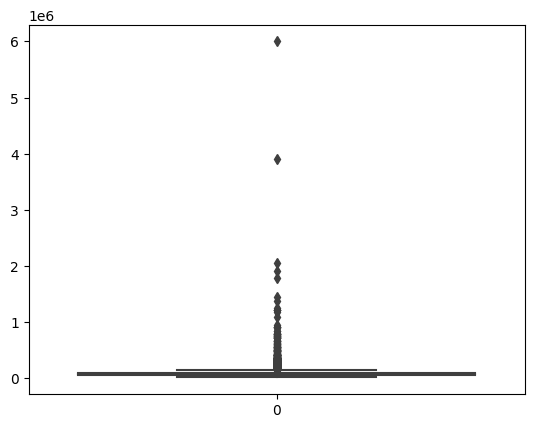

In [65]:
sns.boxplot(loan_data_status.annual_inc)

In [66]:
loan_data_status = loan_data_status[loan_data_status['annual_inc'] < 1000000]

Boxplot shows the annual income above 1 million are outliers, so we can remove this data

<Axes: >

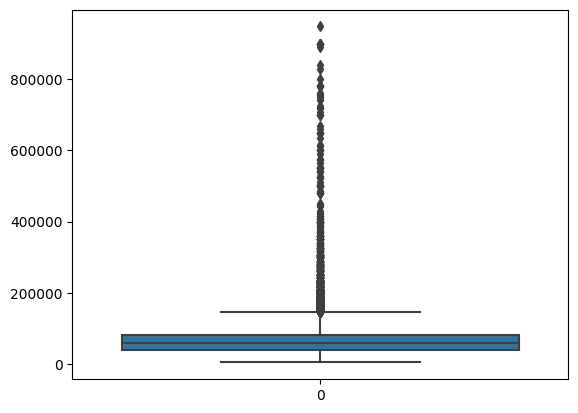

In [67]:
sns.boxplot(loan_data_status['annual_inc'])

**Boxplot still shows the annual income above 200 thousand are outliers, so we can remove this data**

In [68]:
loan_data_status = loan_data_status[loan_data_status['annual_inc'] < 200000]

<Axes: >

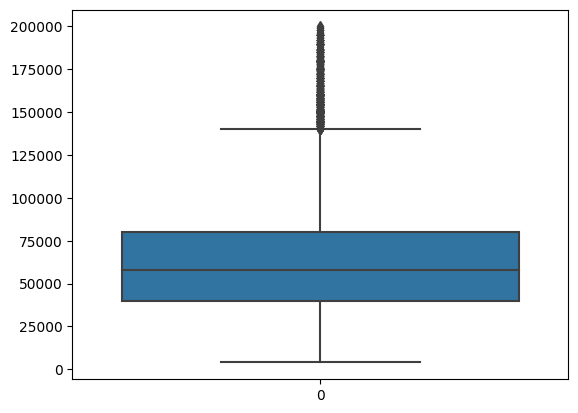

In [69]:
sns.boxplot(loan_data_status['annual_inc'])

<Axes: >

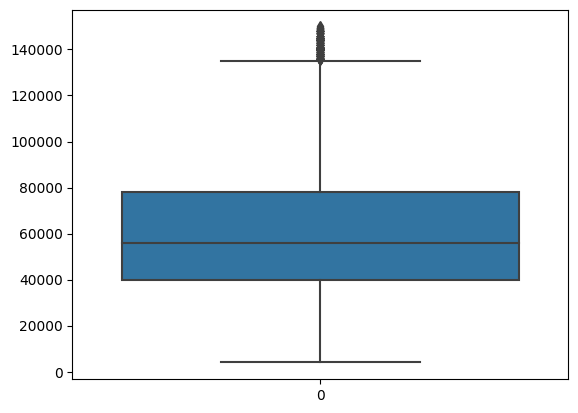

In [70]:
loan_data_status = loan_data_status[loan_data_status['annual_inc'] < 150000]
sns.boxplot(loan_data_status['annual_inc'])

**Finally we have removed all the outliers based on annual_inc**

<Axes: >

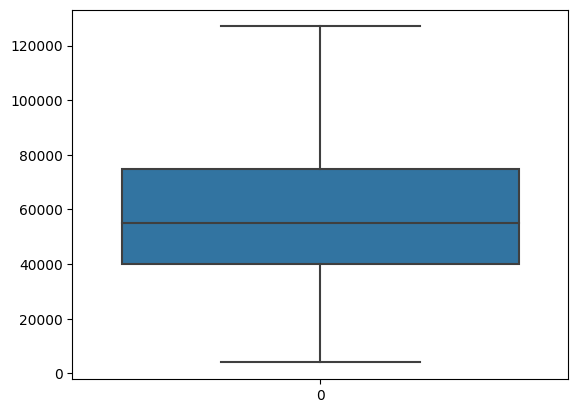

In [71]:
loan_data_status = loan_data_status[loan_data_status['annual_inc'] < 127000]
sns.boxplot(loan_data_status['annual_inc'])

In [72]:
loan_data_status['annual_inc_range'] = pd.cut(x=loan_data_status['annual_inc'],bins=[0,20000, 40000, 80000, 100000, 120000,140000])

In [73]:
loan_data_status.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,annual_inc_range
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,"(20000, 40000]"
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,car,GA,"(20000, 40000]"
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,"(0, 20000]"
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,"(40000, 80000]"
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,"(20000, 40000]"


In [74]:
len(loan_data_status)

35857

In [75]:
loan_data_status.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
addr_state             0
annual_inc_range       0
dtype: int64

In [76]:
loan_data_status.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'annual_inc_range'],
      dtype='object')

<Axes: xlabel='term', ylabel='count'>

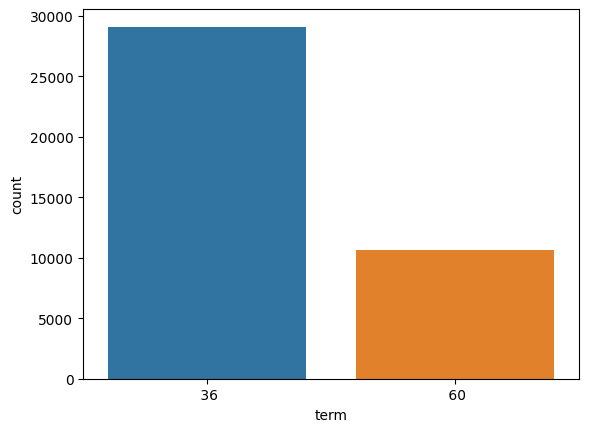

In [77]:
sns.countplot(x=loan_data.term)

Analyse the loan_amnt and fit it into bins

In [78]:
loan_data_status['loan_amnt'].describe()

count    35857.000000
mean     10554.709680
std       6952.086514
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**verification_status** we can change Source Verified to Verified

In [79]:
loan_data_status.verification_status.value_counts()

Not Verified       16076
Verified           10822
Source Verified     8959
Name: verification_status, dtype: int64

In [80]:
loan_data_status.verification_status = loan_data_status.verification_status.replace('Source Verified','Verified')

**Since loan_status is string, we dont see the insights in the below table. Let's change loan_status to int by setting 'Fully Paid' to 1 'Charged Off' to 0**

In [81]:
loan_data_status.loan_status = loan_data_status.loan_status.apply(lambda x : 1 if x == 'Fully Paid' else 0)

In [82]:
pd.pivot_table(index='purpose',columns='home_ownership',values='loan_status',aggfunc=np.mean,data=loan_data_status)
#sns.pivot(x=loan_data_status['emp_length'])

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
purpose,,,,,
car,0.900293,NaN,0.500000,0.895833,0.876667
credit_card,0.891382,NaN,0.818182,0.865455,0.891780
debt_consolidation,0.842230,1.0,0.842105,0.842845,0.846343
educational,0.864198,NaN,1.000000,0.750000,0.816425
home_improvement,0.878074,NaN,0.800000,0.864111,0.847107
house,0.872881,NaN,1.000000,0.892857,0.810811
major_purchase,0.915049,NaN,1.000000,0.879630,0.877339
medical,0.847059,NaN,1.000000,0.843750,0.830065
moving,0.906977,NaN,0.000000,0.750000,0.823389


**Looking at above data home ownership doesn't look like a driver variable. We can ignore this column**

**Lets check the loan_amnt shows any variance of the loan status**

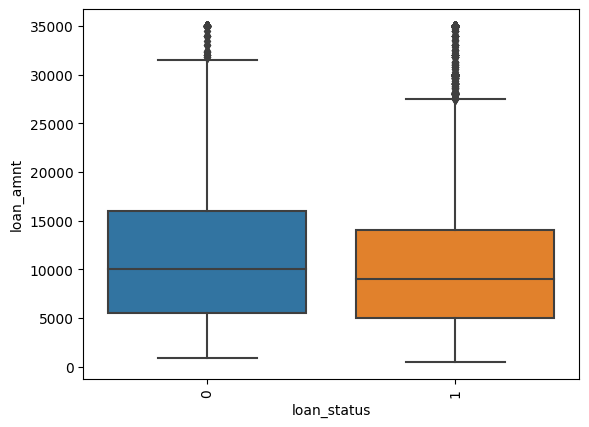

In [83]:
sns.boxplot(y='loan_amnt',x='loan_status',data=loan_data_status)
plt.xticks(rotation=90)
plt.show()

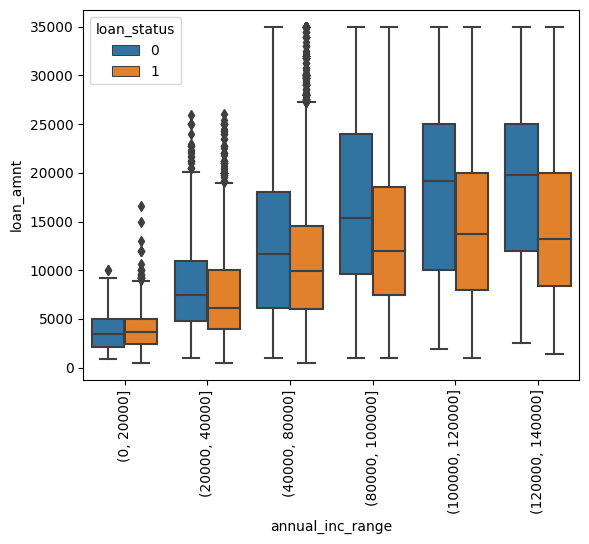

In [84]:
sns.boxplot(y='loan_amnt',x='annual_inc_range',hue='loan_status',data=loan_data_status)
#sns.boxplot(y='loan_amnt',x='loan_status',data=loan_data_status)
plt.xticks(rotation=90)
plt.show()

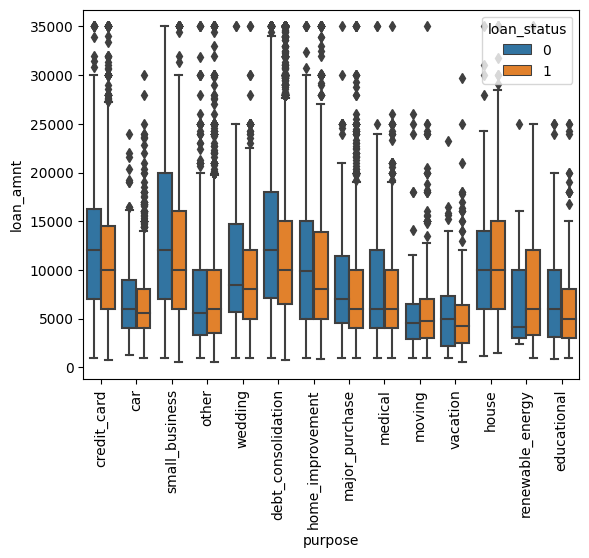

In [85]:
sns.boxplot(y='loan_amnt',x='purpose',hue='loan_status',data=loan_data_status)
#sns.boxplot(y='loan_amnt',x='loan_status',data=loan_data_status)
plt.xticks(rotation=90)
plt.show()

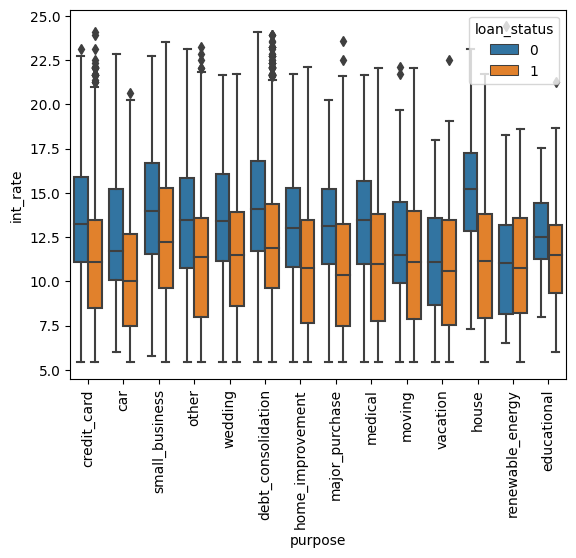

In [86]:
sns.boxplot(y='int_rate',x='purpose',hue='loan_status',data=loan_data_status)
#sns.boxplot(y='loan_amnt',x='loan_status',data=loan_data_status)
plt.xticks(rotation=90)
plt.show()

In [87]:
loan_data_status.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'annual_inc_range'],
      dtype='object')

**Lets group the data by purpose and see what insights we are getting.**

In [88]:
loan_data_status.groupby(by='purpose').mean()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status
purpose,,,,,,
car,6597.058824,10.477640,185.930427,4.683473,56659.465420,0.889356
credit_card,11139.995716,11.559501,332.570088,4.688303,61766.576894,0.889889
debt_consolidation,12055.568986,12.328587,351.147284,4.869399,59201.469468,0.844458
educational,6618.971061,11.627974,211.360965,3.340836,47228.169068,0.826367
home_improvement,10199.877301,11.157894,288.057591,5.548466,66894.148613,0.873211
house,11742.771084,12.012410,337.652801,4.487952,61678.241446,0.840361
major_purchase,7623.854011,10.775755,223.245655,4.491779,56293.393279,0.893373
medical,7779.266348,11.425247,224.815167,4.827751,56348.509777,0.838915
moving,5879.575472,11.519660,175.395698,3.407547,51313.738094,0.832075


**Lets see now what group by purpose will give us**

In [89]:
loan_data_status.groupby(by='purpose').mean().sort_values(by='loan_status',ascending=True)

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status
purpose,,,,,,
small_business,12656.689918,12.851211,363.569391,4.374128,62437.207806,0.717819
renewable_energy,8008.333333,11.285914,225.941505,5.268817,59413.662688,0.806452
educational,6618.971061,11.627974,211.360965,3.340836,47228.169068,0.826367
moving,5879.575472,11.519660,175.395698,3.407547,51313.738094,0.832075
other,7574.856204,11.660507,225.828036,4.499863,54918.698447,0.835935
medical,7779.266348,11.425247,224.815167,4.827751,56348.509777,0.838915
house,11742.771084,12.012410,337.652801,4.487952,61678.241446,0.840361
debt_consolidation,12055.568986,12.328587,351.147284,4.869399,59201.469468,0.844458
vacation,5270.334262,10.790111,156.596267,5.125348,54850.712117,0.857939


Observations based on above table

1.   Repayment of loans related to Life style related expences like wedding, purchase, credit card, car and home_improvement is high.
2.   Repayment of loans related to Small business loans, Renewable energy, Educational is very low.





**Lets ceate a pivot table to check the successful payment averages among customers from different income groups and purpose of loan **

In [90]:
pd.pivot_table(index='purpose',values=('loan_amnt','loan_status'),columns='annual_inc_range',data=loan_data_status,aggfunc=np.mean)

loan_amnt                                                \
annual_inc_range     (0, 20000] (20000, 40000] (40000, 80000] (80000, 100000]   
purpose                                                                         
car                 4290.942029    5573.092643    6673.529412     8272.656250   
credit_card         3913.725490    7897.081612   11237.588374    13742.258065   
debt_consolidation  3997.429907    8360.655328   12429.408108    16060.100527   
educational         3875.833333    5301.785714    7600.467290     9531.000000   
home_improvement    4708.333333    6859.555288    9853.574281    12579.411765   
house               4422.222222    8943.661972   12260.814607    13330.978261   
major_purchase      4041.831683    6113.950276    7902.047952     9551.535088   
medical             4312.500000    5784.116022    8248.892405    10738.432836   
moving              2807.222222    4632.941176    6034.876543     9957.926829   
other               3617.613636    5714.943074    8037.781955    10242.636139   
renewable_energy    2380.000000    4950.000000    8899.390244     9630.000000   
small_business      4445.312500    8365.135542   12962.484549    16025.900000   
vacation            2740.000000    4773.267327    5403.867403     6266.216216   
wedding             4173.437500    6580.598958    9677.150000    12463.157895   

                                                     loan_status  \
annual_inc_range   (100000, 120000] (120000, 140000]  (0, 20000]   
purpose                                                            
car                     8037.941176     12125.000000    0.855072   
credit_card            15706.233062     16368.650794    0.901961   
debt_consolidation     17486.308927     17021.338384    0.810748   
educational            12044.736842     13000.000000    0.833333   
home_improvement       13514.019608     12487.234043    0.818182   
house                  14607.500000     17000.000000    0.777778   
major_purchase         11378.738318      9916.666667    0.821782   
medical                 9866.216216     18000.000000    0.625000   
moving                 10174.038462     12595.000000    0.777778   
other                  11430.348837     11844.827586    0.750000   
renewable_energy       14838.888889      4500.000000    0.600000   
small_business         17452.826087     20382.608696    0.645833   
vacation                7378.947368      5000.000000    0.800000   
wedding                11770.454545     12054.545455    0.812500   

                                                                  \
annual_inc_range   (20000, 40000] (40000, 80000] (80000, 100000]   
purpose                                                            
car                      0.877384       0.893297        0.900000   
credit_card              0.856405       0.892380        0.908065   
debt_consolidation       0.813657       0.847784        0.873624   
educational              0.806122       0.841121        0.840000   
home_improvement         0.848558       0.857827        0.895928   
house                    0.788732       0.870787        0.847826   
major_purchase           0.858195       0.905095        0.934211   
medical                  0.839779       0.829114        0.910448   
moving                   0.764706       0.876543        0.829268   
other                    0.816888       0.843262        0.896040   
renewable_energy         0.740741       0.829268        0.900000   
small_business           0.689759       0.703337        0.776000   
vacation                 0.841584       0.845304        0.945946   
wedding                  0.880208       0.900000        0.915789   

                                                      
annual_inc_range   (100000, 120000] (120000, 140000]  
purpose                                               
car                        0.905882         0.937500  
credit_card                0.918699         0.936508  
debt_consolidation         0.886660         0.863636  


**Observations from above table**


1.   Re-payment of educational and medical loan among the highest income group is very low. Also the average loan amout of these is relatively high.



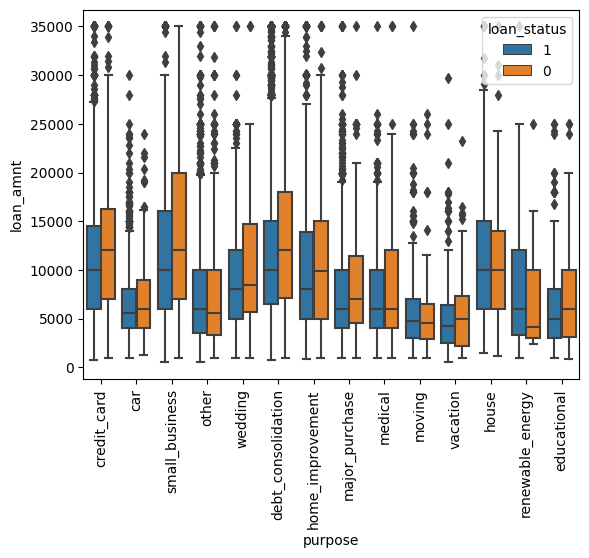

In [91]:
sns.boxplot(x="purpose", y="loan_amnt",hue="loan_status",data=loan_data_status,hue_order=[1,0])
plt.xticks(rotation=90)
plt.show()

**Below, you can see the higher the interest rate the probability of re-paying the loan is less. This is primarily seen in house, car and small business loans**

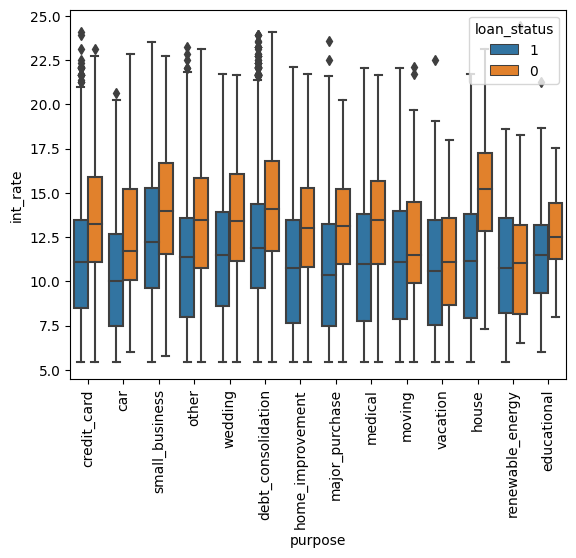

In [92]:
sns.boxplot(x="purpose", y="int_rate",hue="loan_status",data=loan_data_status,hue_order=[1,0])
plt.xticks(rotation=90)
plt.show()

In [93]:
pd.pivot_table(index='purpose',values=('loan_status'),columns='annual_inc_range',data=loan_data_status,aggfunc=np.mean)

annual_inc_range,"(0, 20000]","(20000, 40000]","(40000, 80000]","(80000, 100000]","(100000, 120000]","(120000, 140000]"
purpose,,,,,,
car,0.855072,0.877384,0.893297,0.900000,0.905882,0.937500
credit_card,0.901961,0.856405,0.892380,0.908065,0.918699,0.936508
debt_consolidation,0.810748,0.813657,0.847784,0.873624,0.886660,0.863636
educational,0.833333,0.806122,0.841121,0.840000,0.842105,0.500000
home_improvement,0.818182,0.848558,0.857827,0.895928,0.945098,0.936170
house,0.777778,0.788732,0.870787,0.847826,0.750000,0.875000
major_purchase,0.821782,0.858195,0.905095,0.934211,0.943925,0.888889
medical,0.625000,0.839779,0.829114,0.910448,0.945946,0.500000
moving,0.777778,0.764706,0.876543,0.829268,0.923077,1.000000


Grade and Sub-grade comparision

Pivot table to compare grades against income range and see the loan status

**obsevation**
Low loan grades for the customer with annual income less than 40k is resulting in higher defaults

In [94]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(pd.pivot_table(index=['grade'],values='loan_status',columns='annual_inc_range',data=loan_data_status,aggfunc=np.mean))

annual_inc_range  (0, 20000]  (20000, 40000]  (40000, 80000]  (80000, 100000]  \
grade                                                                           
A                   0.882353        0.909982        0.942948         0.965004   
B                   0.823848        0.840398        0.880444         0.905395   
C                   0.744275        0.790685        0.827514         0.860438   
D                   0.718563        0.740741        0.779600         0.812395   
E                   0.709091        0.678899        0.713505         0.786704   
F                   0.777778        0.637931        0.629386         0.745098   
G                   0.333333        0.441176        0.638655         0.650000   

annual_inc_range  (100000, 120000]  (120000, 140000]  
grade                                                 
A                         0.973597          0.965517  
B                         0.924585          0.916667  
C                         0.875576          0.8720

**From below boxplot, we can conclude that even when the ratings are low, customer with higher income are repaying the loans.
Customer with low income are repaying less even when their loan grade is good**

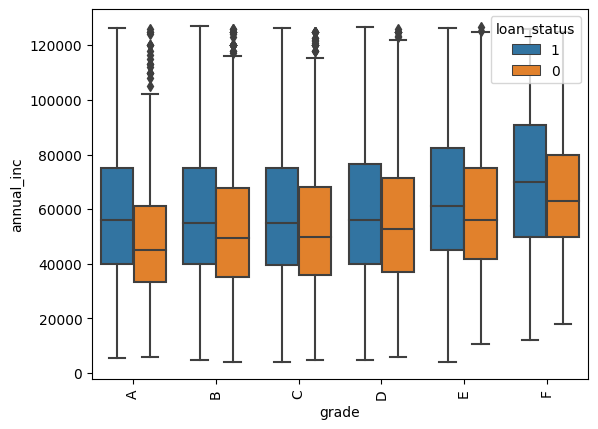

In [95]:
sns.boxplot(x="grade", y="annual_inc",hue="loan_status",data=loan_data_status,hue_order=[1,0],order=['A', 'B', 'C','D','E','F'])
plt.xticks(rotation=90)
plt.show()

In [96]:
#sns.barplot(x=loan_data_status['purpose'],y=len(loan_data_status['loan_status']),estimator=lambda x: len(x=='Fully Paid')*100.0/len(x))
pd.pivot_table(index='purpose',values='loan_status',columns='emp_length',data=loan_data_status,aggfunc=(lambda x : sum(x)/len(x) * 100))



emp_length,0,1,2,3,4,5,6,7,8,9,10
purpose,,,,,,,,,,,
car,87.727273,86.923077,93.243243,88.111888,87.068966,90.163934,88.764045,86.301370,91.228070,92.857143,88.888889
credit_card,87.843705,91.183295,91.245136,89.791667,89.260143,86.253369,87.596899,86.301370,89.808917,91.358025,88.612836
debt_consolidation,84.064969,84.712901,86.349372,85.836177,86.390927,85.387812,84.667969,83.396226,84.522003,84.210526,81.968099
educational,79.220779,88.372093,82.222222,73.076923,73.333333,80.952381,100.000000,88.888889,100.000000,87.500000,88.888889
home_improvement,83.157895,81.600000,87.551867,89.082969,89.393939,84.924623,90.070922,90.566038,90.434783,86.746988,87.966805
house,91.111111,82.142857,79.166667,92.500000,87.096774,92.857143,69.230769,72.222222,83.333333,87.500000,78.688525
major_purchase,87.179487,88.571429,90.128755,86.919831,92.090395,88.888889,88.793103,94.871795,93.548387,90.566038,89.583333
medical,78.494624,80.357143,86.486486,83.870968,88.461538,88.095238,86.666667,80.000000,76.923077,100.000000,84.313725
moving,80.851064,79.661017,83.606557,88.135593,82.000000,81.081081,92.000000,87.500000,76.923077,76.470588,88.333333


**Verification status doent give much variation with respective loan repayment**

In [97]:
pd.pivot_table(index='purpose',values='loan_status',columns='verification_status',data=loan_data_status,aggfunc=(lambda x : sum(x)/len(x) * 100))

verification_status,Not Verified,Verified
purpose,,
car,91.076115,86.486486
credit_card,90.862709,87.380573
debt_consolidation,86.936680,82.689988
educational,83.555556,80.232558
home_improvement,87.791741,86.927122
house,82.307692,85.148515
major_purchase,90.476190,88.188188
medical,82.698962,84.911243
moving,86.462882,80.730897


**Analysis using home ownership didnt give much variance to come to conclusion**

In [98]:
pd.pivot_table(index='purpose',values='loan_status',columns='home_ownership',data=loan_data_status,aggfunc=(lambda x : sum(x)/len(x) * 100))

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
purpose,,,,,
car,90.029326,NaN,50.000000,89.583333,87.666667
credit_card,89.138195,NaN,81.818182,86.545455,89.178026
debt_consolidation,84.223013,100.0,84.210526,84.284533,84.634255
educational,86.419753,NaN,100.000000,75.000000,81.642512
home_improvement,87.807431,NaN,80.000000,86.411150,84.710744
house,87.288136,NaN,100.000000,89.285714,81.081081
major_purchase,91.504854,NaN,100.000000,87.962963,87.733888
medical,84.705882,NaN,100.000000,84.375000,83.006536
moving,90.697674,NaN,0.000000,75.000000,82.338902


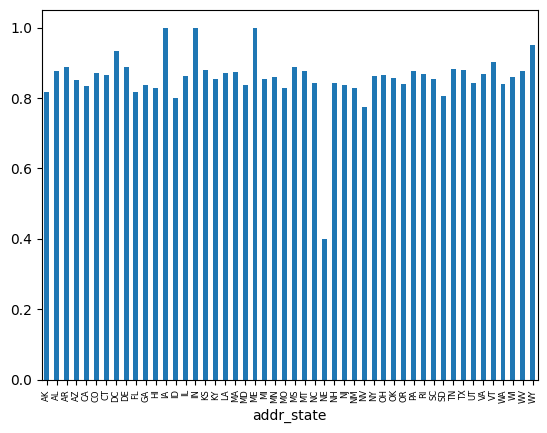

In [99]:
loan_data_status.groupby(by='addr_state')['loan_status'].mean().plot.bar()
plt.xticks(fontsize=6)
#plt.figure(figsize=(50,50))
plt.show()